In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from os.path import join

PAPER_DIMS = (8.0, 3.0)

sns.set_theme(
    context="paper", 
    style="ticks", 
    font_scale=1.75
)

In [4]:
filenames = dict(
    # cifar={"main":  join("cifar", "cifar-main-data.csv"),
    #        "dcfl":  join("cifar", "cifar-dcfl-data.csv")},
    cifar={"main": join("cifar", "new", "CIFAR_100users_data_main_Global_1106-2020.json"),
           "dcfl": join("cifar", "new", "CIFAR_100users_data_DCFL_Global_1106-2020.json")},
    # mnist={"main":  join("mnist", "MNIST_100users_data_main_Global_10-27-2020.json"),
    #        "dcfl":  join("mnist", "MNIST_100users_data_DCFL_Global_10-27-2020.json")},
    mnist={"main":  join("mnist", "new", "MNIST_100users_data_main_Global_1105-2020.json"),
           "dcfl":  join("mnist", "new", "MNIST_100users_data_DCFL_Global_1105-2020.json")},
    # fmnist={"main": join("fmnist", "FMNIST_100users_data_main_Global_10-27-2020.json"),
    #         "dcfl": join("fmnist", "FMNIST_100users_data_dcfl_Global_10-27-2020.json")},
    fmnist={"main":  join("fmnist", "new", "FMNIST_100users_data_main_Global_1104-2020.json"),
           "dcfl":  join("fmnist", "new", "FMNIST_100users_data_DCFL_Global_1104-2020.json")},
    # final_cifar={"main": join("cifar", "cifar-main-final-data.csv"),
    #              "dcfl": join("cifar", "cifar-dcfl-final-data.csv")},
    final_cifar={"main": join("cifar", "new", "Final_CIFAR_100users_data_main_Global_1106-2020.json"),
                 "dcfl": join("cifar", "new", "Final_CIFAR_100users_data_DCFL_Global_1106-2020.json")},
    final_mnist={"main": join("mnist", "new", "FINAL_MNIST_100users_data_main_Global_1105-2020.json"),
                 "dcfl": join("mnist", "new", "FINAL_MNIST_100users_data_DCFL_Global_1105-2020.json")},
    final_fmnist={"main": join("fmnist", "new", "FINAL_FMNIST_100users_data_main_Global_1104-2020.json"),
                  "dcfl": join("fmnist", "new", "FINAL_FMNIST_100users_data_DCFL_Global_1104-2020.json")},
)

def get_data(code: str) -> pd.DataFrame:
    assert code in filenames, f"Code must be one of the following: {list(filenames.keys())}."

    main_path = filenames[code]["main"]
    dcfl_path = filenames[code]["dcfl"]
    
    if main_path.endswith(".json"):
        main_data = pd.read_json(main_path)
        dcfl_data = pd.read_json(dcfl_path)
    elif main_path.endswith(".csv"):
        main_data = pd.read_csv(main_path)
        dcfl_data = pd.read_csv(dcfl_path)
    else:
        raise ValueError("Invalid file type.")

    main_data["alg"]  = ["main" for i in range(len(main_data))]
    main_data["data"] = [code   for i in range(len(main_data))]

    dcfl_data["alg"]  = ["dcfl" for i in range(len(dcfl_data))]
    dcfl_data["data"] = [code   for i in range(len(dcfl_data))]

    merged_data = pd.concat([main_data, dcfl_data])

    # This part is to clean the labels and what not to make clearer plot labels.
    merged_data = merged_data.rename(columns={"alg": "FL Algorithm"})
    merged_data = merged_data.replace("main", "Standard") # Baseline FL.
    merged_data = merged_data.replace("dcfl", "ACS")     # Our algorithm.

    merged_data.C = merged_data.C.round(decimals=1)
    # merged_data = merged_data.query("C == 0.2 or C == 0.4 or C == 0.6 or C == 0.8 or C == 1.0")

    return merged_data


In [5]:
cifar = get_data("cifar")
fmnist = get_data("fmnist")
mnist = get_data("mnist")
data = pd.concat([cifar, mnist, fmnist])

final_cifar = get_data("final_cifar")
final_fmnist = get_data("final_fmnist")
final_mnist = get_data("final_mnist")
final_data = pd.concat([final_cifar, final_mnist, final_fmnist])

     C  Test Accuracy  Test Loss  Train Loss  Train Accuracy FL Algorithm  \
1  0.2      33.250000   1.986981    1.935835       33.832001     Standard   
3  0.4      54.000000   1.389733    1.236474       57.192001     Standard   
5  0.6      53.869999   1.505455    1.177050       60.341999     Standard   
7  0.8      57.349998   1.404313    1.037900       64.082001     Standard   
9  1.0      57.230000   1.440438    0.952859       66.660004     Standard   

          data  
1  final_cifar  
3  final_cifar  
5  final_cifar  
7  final_cifar  
9  final_cifar  


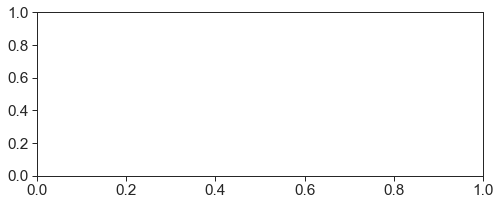

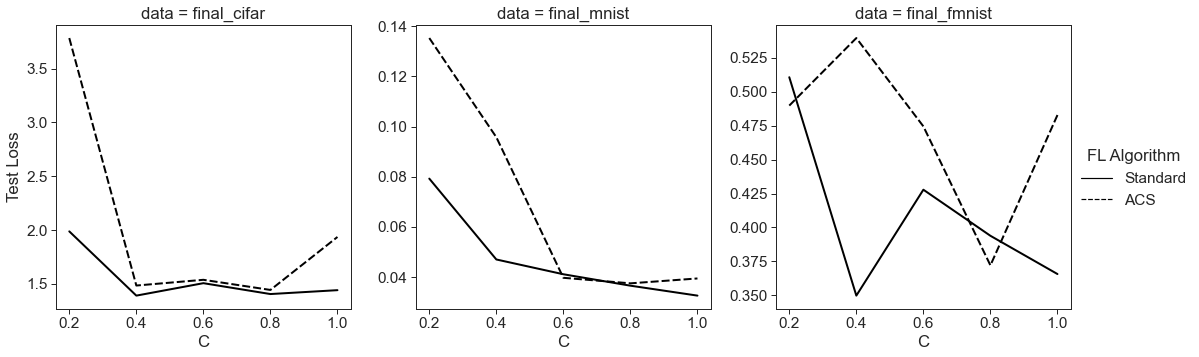

In [6]:
print(final_data.head())
# sns.lineplot(
#     x="C",
#     y="Test Loss",
#     hue="FL Algorithm",
#     style="FL Algorithm",
#     data=final_data
# )

fig, ax = plt.subplots(figsize=PAPER_DIMS)
g = sns.relplot(
    ax=ax,
    data=final_data,
    kind="line",
    x="C",
    y="Test Loss",
    style="FL Algorithm",
    hue="FL Algorithm",
    col="data",
    facet_kws={"sharey": False, "despine": False},
    ci=None,
    linewidth=2,
    palette=["black", "black"],
)
plt.savefig(join("plots", "final_test_loss.pdf"))
plt.show()

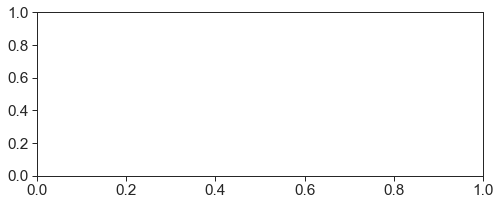

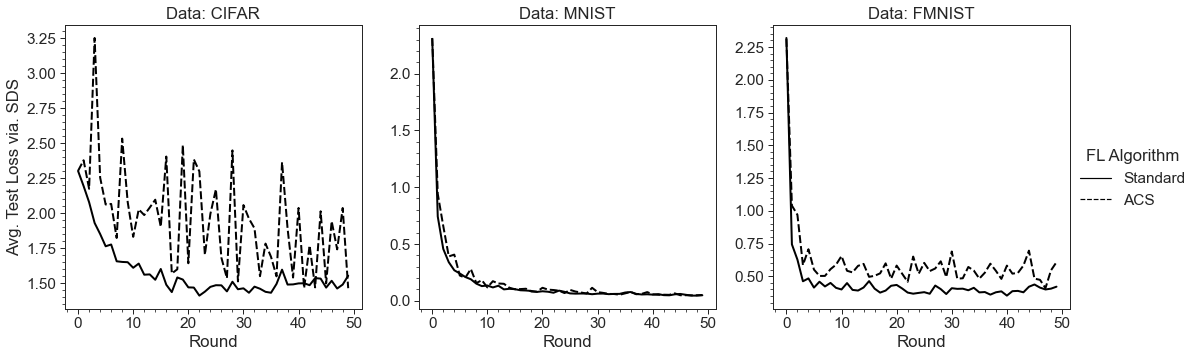

In [7]:
fig, ax = plt.subplots(figsize=PAPER_DIMS)
g = sns.relplot(
    ax=ax,
    data=data,
    kind="line",
    x="Round",
    y="Average Loss Test",
    style="FL Algorithm",
    hue="FL Algorithm",
    col="data",
    facet_kws={"sharey": False, "despine": False},
    ci=None,
    linewidth=2,
    palette=["black", "black"],
)

first = True
for data_label, ax in g.axes_dict.items():
    ax.set_title(f"Data: {data_label.upper()}")
    ax.minorticks_on()
    if first:
        ax.set_ylabel("Avg. Test Loss via. SDS")
        first = False
    else:
        ax.set_ylabel("")

plt.savefig(join("plots", "loss.pdf"))
plt.show()

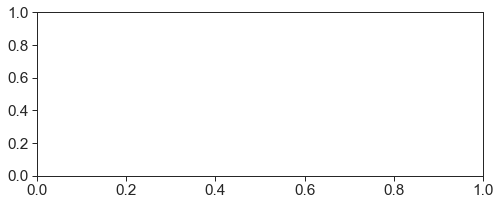

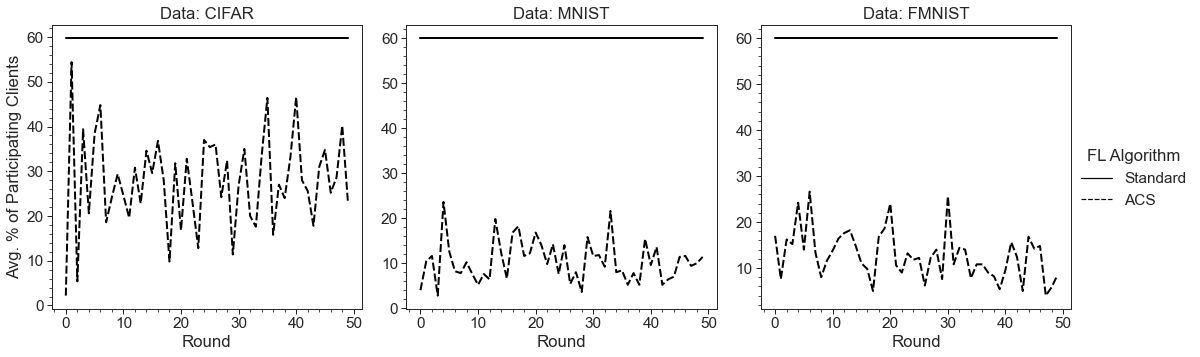

In [8]:
fig, ax = plt.subplots(figsize=PAPER_DIMS)
g = sns.relplot(
    ax=ax,
    data=data,
    kind="line",
    x="Round",
    y="Workers Number",
    style="FL Algorithm",
    hue="FL Algorithm",
    col="data",
    facet_kws={"sharey": False, "despine": False},
    ci=None,
    linewidth=2,
    palette=["black", "black"],
)

first = True
for data_label, ax in g.axes_dict.items():
    ax.set_title(f"Data: {data_label.upper()}")
    ax.minorticks_on()
    if first:
        ax.set_ylabel("Avg. % of Participating Clients")
        first = False
    else:
        ax.set_ylabel("")

plt.savefig(join("plots", "participation.pdf"))
plt.show()

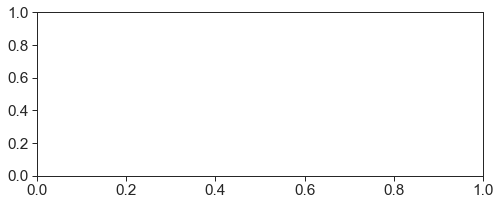

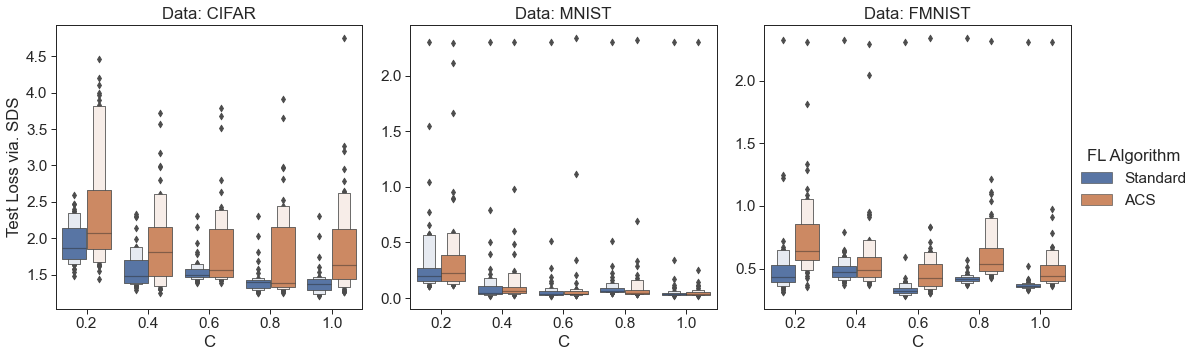

In [9]:
fig, ax = plt.subplots(figsize=PAPER_DIMS)
g = sns.catplot(
    ax=ax,
    data=data,
    kind="boxen",
    x="C",
    y="Average Loss Test",
    hue="FL Algorithm",
    col="data",
    sharey=False,
    facet_kws={"despine": False},
)

first = True
for data_label, ax in g.axes_dict.items():
    ax.set_title(f"Data: {data_label.upper()}")
    if first:
        ax.set_ylabel("Test Loss via. SDS")
        first = False
    else:
        ax.set_ylabel("")

plt.savefig(join("plots", "C-loss.pdf"))
plt.show()

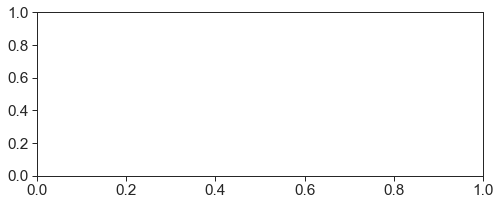

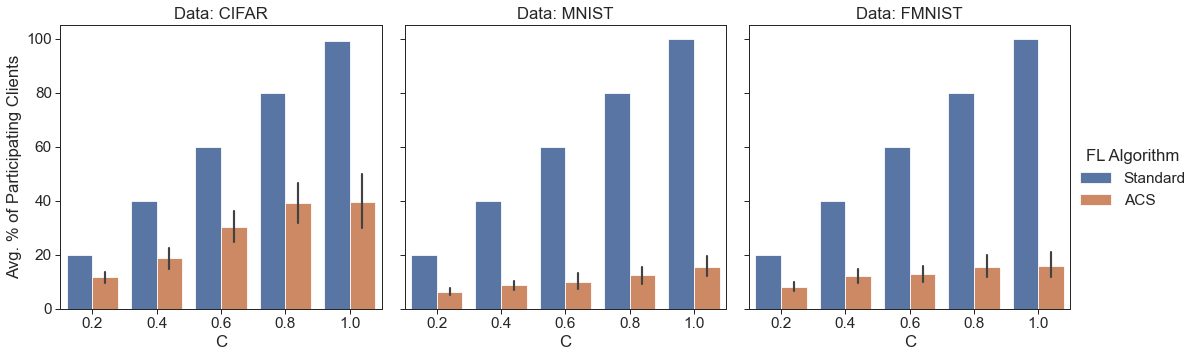

In [10]:
fig, ax = plt.subplots(figsize=PAPER_DIMS)
g = sns.catplot(
    ax=ax,
    data=data,
    kind="bar",
    x="C",
    y="Workers Number",
    hue="FL Algorithm",
    col="data",
    facet_kws={"sharey": False, "despine": False},
)

first = True
for data_label, ax in g.axes_dict.items():
    ax.set_title(f"Data: {data_label.upper()}")
    if first:
        ax.set_ylabel("Avg. % of Participating Clients")
        first = False
    else:
        ax.set_ylabel("")

plt.savefig(join("plots", "C-participation.pdf"))
plt.show()

# Data Analysis
Here, we perform some basic scientific analysis of the data so we have some percentages and trends to amplify the significance of the results.

In [11]:
decrease   = lambda x1, x2: x1 - x2
percentage = lambda x1, x2: (decrease(x1, x2) / x1) * 100

In [12]:
algs = list(data["FL Algorithm"].unique())
code = list(data["data"].unique())

print("<===| AVG. # PARTICIPATING CLIENTS |===>")
feature = "Workers Number"
for c in code:
    sub_data = data.query(f"data == '{c}'")
    x1 = sub_data.query("`FL Algorithm` == 'Standard'")[feature].mean()
    x2 = sub_data.query("`FL Algorithm` == 'ACS'")[feature].mean()
    print(f"|> Avg. percentage improvement ({c}): {percentage(x1, x2):0.2f}%.")

x1 = data.query("`FL Algorithm` == 'Standard'")[feature].mean()
x2 = data.query("`FL Algorithm` == 'ACS'")[feature].mean()
print(f"|> Avg. percentage improvement (*): {percentage(x1, x2):0.2f}%.")




print("\n<===| AVG. LOSS |===>")
feature = "Average Loss Test"
for c in code:
    sub_data = data.query(f"data == '{c}'")
    x1 = sub_data.query("`FL Algorithm` == 'Standard'")[feature].mean()
    x2 = sub_data.query("`FL Algorithm` == 'ACS'")[feature].mean()
    print(f"|> Avg. loss ratio ({c}): {percentage(x2, x1):0.2f}%.")

x1 = data.query("`FL Algorithm` == 'Standard'")[feature].mean()
x2 = data.query("`FL Algorithm` == 'ACS'")[feature].mean()
print(f"|> Avg. loss ratio (*): {percentage(x2, x1):0.2f}%.")

<===| AVG. # PARTICIPATING CLIENTS |===>
|> Avg. percentage improvement (cifar): 53.60%.
|> Avg. percentage improvement (mnist): 82.51%.
|> Avg. percentage improvement (fmnist): 78.67%.
|> Avg. percentage improvement (*): 71.61%.

<===| AVG. LOSS |===>
|> Avg. loss ratio (cifar): 19.54%.
|> Avg. loss ratio (mnist): 11.97%.
|> Avg. loss ratio (fmnist): 24.73%.
|> Avg. loss ratio (*): 20.19%.
